## 1 导入数据

In [23]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

unique_risk = pd.read_csv('unique_risk.csv')

In [32]:
#将审核结果编码为0和1，作为一个可以进行机器学习的指标 （认为“发行股份购买资产获无条件通过”比“发行股份购买资产获有条件通过”好）
#删除公司名称列，该列无法作为特征学习的指标
unique_risk = unique_risk.drop(labels=['公司名称'], axis=1)
unique_risk['审核结果']=unique_risk['审核结果'].map({'发行股份购买资产获无条件通过':1,'发行股份购买资产获有条件通过':0})
unique_risk.head(5)

,审核结果,Rc,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,1,0.02,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0,0.02,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0,0.05,1417.0,0.63,0.29,34.65,14.88,6.20,0.29,0.40,...,44.80,113.26,0.01,1.01,0.02,0.00,0.74,0.93,0.51,0.28
3,1,0.01,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
4,1,0.01,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00


In [53]:
target=unique_risk['Rc']
target.head(5)

0    0.02
1    0.02
2    0.05
3    0.01
4    0.01
Name: Rc, dtype: float64

In [54]:
data=unique_risk.drop(labels=['Rc'],axis=1)
data.head(5)

,审核结果,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,最近一个完整会计年度对第一供应商的采购占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,1,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,0.41,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,0.13,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0,1417.0,0.63,0.29,34.65,14.88,6.20,0.29,0.40,0.31,...,44.80,113.26,0.01,1.01,0.02,0.00,0.74,0.93,0.51,0.28
3,1,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,0.07,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
4,1,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,0.14,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00


In [81]:
# 抽取 30% 的数据作为测试集，其余作为训练集
from sklearn.model_selection import train_test_split
train, test = train_test_split(unique_risk, test_size = 0.3)

In [82]:
#分解成为特征矩阵和结果矩阵
train_X = train.drop(labels=["Rc"], axis=1)
train_y=train['Rc']
test_X= test.drop(labels=["Rc"], axis=1)
test_y =test['Rc']

In [83]:
from sklearn.preprocessing import StandardScaler
# 采用 Z-Score 规范化数据，保证每个特征维度的数据均值为 0，方差为 1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

## 2 不进行特征工程，直接进行机器学习

### 2.1 罗列回归模型
具体模型解释参考：
https://zhuanlan.zhihu.com/p/62034592<br>
http://ster.im/py_sklearn_1/#Gradient-Boosting%E5%9B%9E%E5%BD%92

In [108]:
#最小二乘法线性回归
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()

# 岭回归
from sklearn.linear_model import RidgeCV
model_RidgeCV= RidgeCV()

#Lasso回归
from sklearn.linear_model import LassoCV
model_LassoCV= LassoCV()

#Elastic Net回归
from sklearn.linear_model import ElasticNetCV
model_ElasticNetCV = ElasticNetCV()

#贝叶斯岭回归
from sklearn.linear_model import BayesianRidge
model_BayesianRidge=BayesianRidge()

#SGD回归
from sklearn.linear_model import SGDRegressor
model_SGDRegressor=SGDRegressor()

####SVM回归####
from sklearn import svm
model_SVR = svm.SVR()

####KNN回归####
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor()

####决策树回归####
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor()

####MLPRegressor神经网络回归####
from sklearn.neural_network import MLPRegressor
model_MLPRegressor=MLPRegressor()

####Bagging回归####
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor()

####随机森林回归####
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20)#这里使用20个决策树

####ExtraTree极端随机树回归####
from sklearn.tree import ExtraTreeRegressor
model_ExtraTreeRegressor = ExtraTreeRegressor()

####Adaboost回归####
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50)#这里使用50个决策树

####GBRT回归####
from sklearn import ensemble
model_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(n_estimators=100)#这里使用100个决策树

以下两个包我还没有装  暂时先不处理

In [107]:
import lightgbm as lgb
model_LGBMRegressor= lgb.LGBMRegressor()

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
import xgboost as xgb
model_XGBRegressor = xgb.XGBRegressor()

### 2.2 模型评估
&ensp; 由于数据量不够大，采用交叉验证取平均值的方法进行评估。<br> &ensp; sklearn当中使用均方误差作为评判标准时，却是计算”负均方误差“（neg_mean_squared_error）。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示

In [96]:
from sklearn.model_selection import cross_val_score
score=[]
score=cross_val_score(model_SVR,data,target,cv=10,scoring='r2')
score.mean()

-0.4418840639262944

In [87]:
from sklearn.model_selection import cross_val_score
score=[]
score=cross_val_score(model_SVR,data,target,cv=10,scoring='neg_mean_squared_error')
score.mean()

-0.00033243565031769223

In [ ]:
###########效果展示##########

In [85]:
#输出拟合结果和R^2分数，并且展示预测值和真实值的区别
def try_different_method(model):
    model.fit(train_X,train_y)
    score = model.score(test_X, test_y)
    result = model.predict(test_X)
    plt.figure()
    plt.plot(np.arange(len(result)), test_y,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

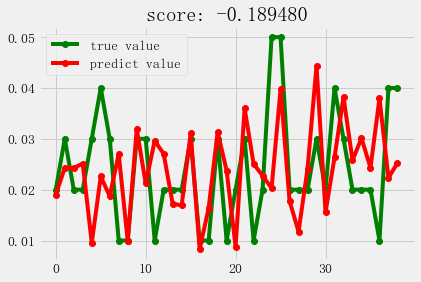

In [109]:
try_different_method(model_LinearRegression)

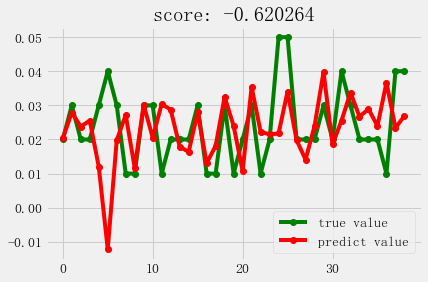

In [110]:
try_different_method(model_RidgeCV)

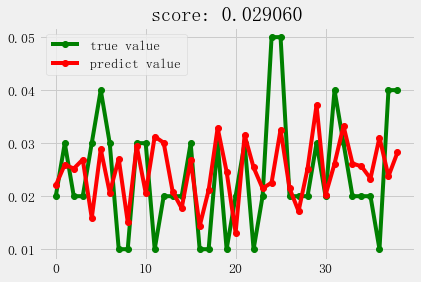

In [111]:
try_different_method(model_LassoCV)

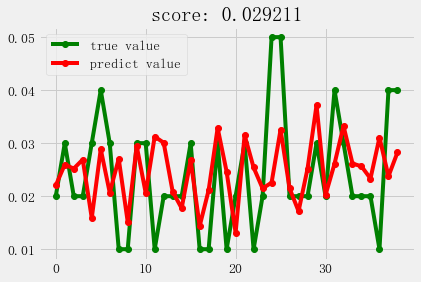

In [112]:
try_different_method(model_ElasticNetCV)

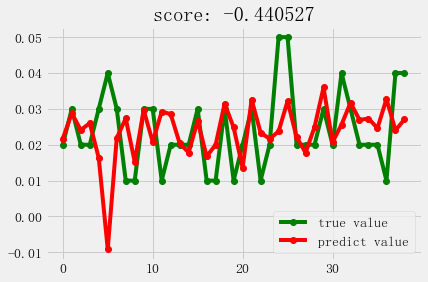

In [152]:
try_different_method(model_BayesianRidge)

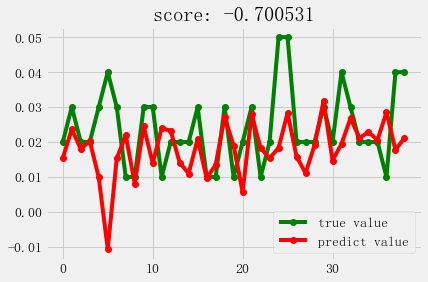

In [158]:
try_different_method(model_SGDRegressor)

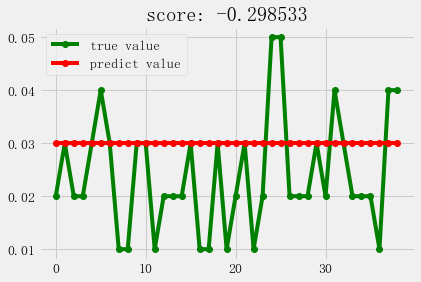

In [159]:
try_different_method(model_SVR)

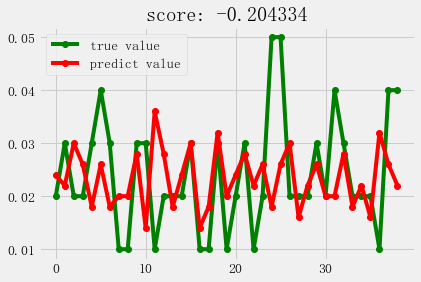

In [160]:
try_different_method(model_KNeighborsRegressor)

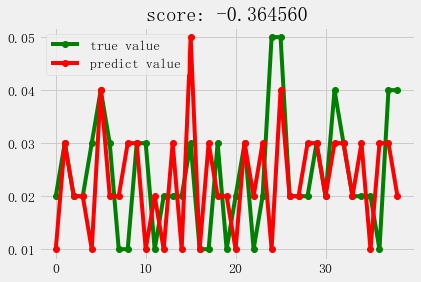

In [172]:
try_different_method(model_DecisionTreeRegressor)

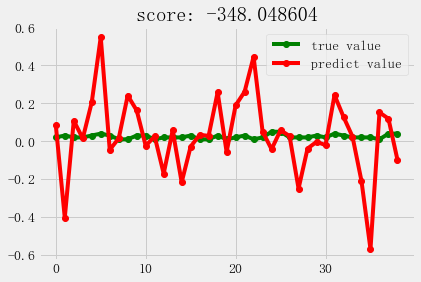

In [199]:
try_different_method(model_MLPRegressor)

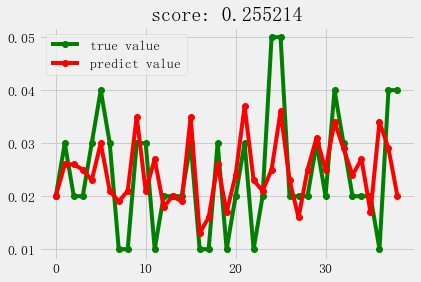

In [209]:
try_different_method(model_BaggingRegressor)

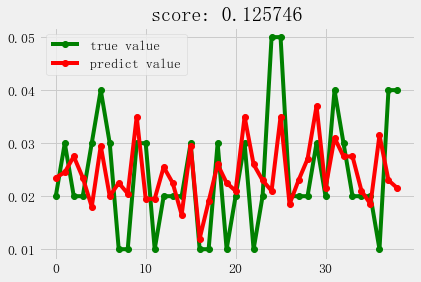

In [203]:
try_different_method(model_RandomForestRegressor)

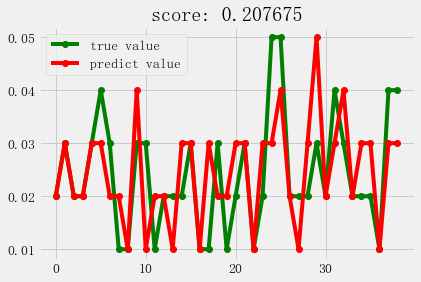

In [225]:
try_different_method(model_ExtraTreeRegressor)

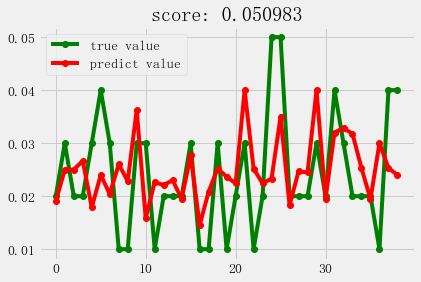

In [226]:
try_different_method(model_AdaBoostRegressor)

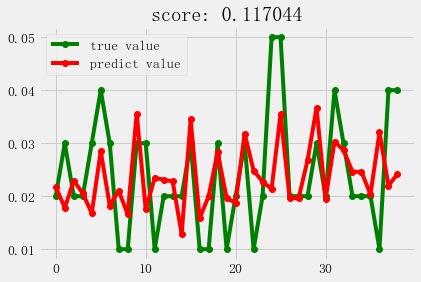

In [227]:
try_different_method(model_GradientBoostingRegressor)

在不调参以及进行特征选择的基础上，各模型结果如下<br>

| 模型                    | R^2          | 是否稳定 |
|-------------------------|-------------|----------|
| 最小二乘法线性回归      | -0.18948    | 稳定     |
| 岭回归                  | -0.620264   | 稳定     |
| Lasso回归               | 0.029060    | 稳定     |
| Elastic Net回归         | 0.029211    | 稳定     |
| 贝叶斯岭回归            | -0.440527   | 稳定     |
| SGD回归                 | -0.700531   | 不稳定   |
| SVM回归                 | -0.298533   | 稳定     |
| KNN回归                 | -0.204334   | 稳定     |
| 决策树回归              | -0.364560   | 不稳定   |
| 神经网络回归            | -348.048604 | 不稳定   |
| Bagging回归             | 0.255214    | 不稳定   |
| 随机森林回归            | 0.125746    | 不稳定   |
| ExtraTree极端随机树回归 | 0.207675    | 不稳定   |
| Adaboost回归            | 0.056661    | 不稳定   |
| GBRT回归                | 0.130862    | 不稳定   |

线性回归模型的表现普遍不是很好。从最小二乘法到Elastic Net回归由于添加了惩罚项，在一定程度上进行了特征选择，因此表现逐步变好。贝叶斯岭和SGD岭回归只是将参数估计方法从最小二乘变成最大化边际对数似然和随机梯度下降，因此无法取得更好的成绩。<br>
SVM回归和神经网络回归由于没有比较好的调参，因此表现不佳。<br>
KNN回归的思想是寻找最近的几个点，求加权平均；树回归本质是将区域分成多个区域。<br>
集成回归模型一般都能将弱分类器变成一个表现较好的分类器。

之后只对Elastic Net回归，GBRT回归，ExtraTree极端随机数回归和Bagging回归进行特征选择和调优，选择比较好的模型

## 3 特征选择

### 3.1 特征选择: Filter
基本思路是通过统计学变量，计算自变量和目标变量之间的关联。<br>
相关系数，卡方检验，信息增益：互信息

<AxesSubplot:>

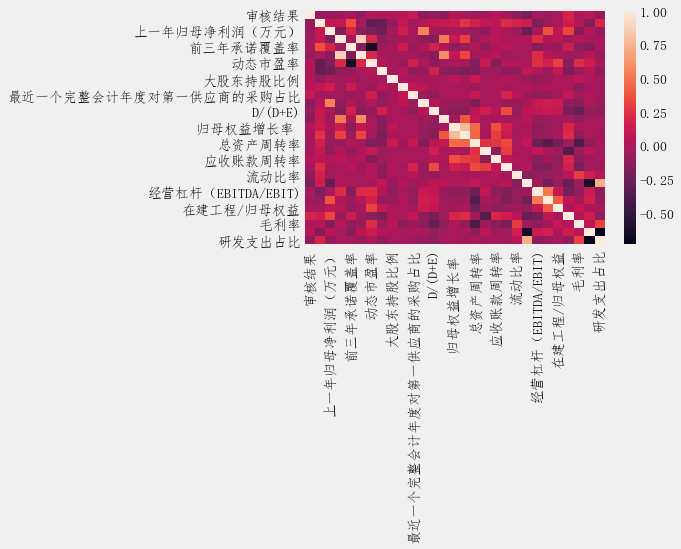

In [34]:
# 用Seaborn 生成热图
import seaborn as sns
import matplotlib.style as style
# 选用一个干净的主题
style.use('fivethirtyeight')
sns.heatmap(unique_risk.corr())

In [33]:
# 只有特征和响应的相关性
unique_risk.corr()['Rc']

审核结果                    -0.094330
Rc                       1.000000
上一年归母净利润（万元）             0.109187
承诺期业绩增长率                 0.103274
前三年承诺覆盖率                 0.359332
静态市盈率                   -0.008756
动态市盈率                   -0.285722
成立年限                    -0.273327
大股东持股比例                 -0.096414
最近一个完整会计年度对第一大客户的销售占比    0.111175
最近一个完整会计年度对第一供应商的采购占比   -0.023155
注入资产净资产账面值(万元)           0.049938
D/(D+E)                  0.111773
总资产增长率                   0.116040
归母权益增长率                  0.131835
净利润增长率                   0.261112
总资产周转率                   0.163145
存货周转率                    0.105613
应收账款周转率                  0.074524
固定资产周转率                  0.219537
流动比率                     0.171855
资产负债率                    0.146701
经营杠杆（EBITDA/EBIT)       -0.178535
（固定资产+土地）/归母权益          -0.080360
在建工程/归母权益               -0.011955
净资产收益率                   0.147229
毛利率                      0.036445
经营性现金流/收入               -0.159281
研发支出占比                   0.193753
Name: Rc, dtyp

In [35]:
# 只留下相关系数超过正负0.2 的特征
unique_risk.corr()['Rc'].abs() > .2

审核结果                     False
Rc                        True
上一年归母净利润（万元）             False
承诺期业绩增长率                 False
前三年承诺覆盖率                  True
静态市盈率                    False
动态市盈率                     True
成立年限                      True
大股东持股比例                  False
最近一个完整会计年度对第一大客户的销售占比    False
最近一个完整会计年度对第一供应商的采购占比    False
注入资产净资产账面值(万元)           False
D/(D+E)                  False
总资产增长率                   False
归母权益增长率                  False
净利润增长率                    True
总资产周转率                   False
存货周转率                    False
应收账款周转率                  False
固定资产周转率                   True
流动比率                     False
资产负债率                    False
经营杠杆（EBITDA/EBIT)        False
（固定资产+土地）/归母权益           False
在建工程/归母权益                False
净资产收益率                   False
毛利率                      False
经营性现金流/收入                False
研发支出占比                   False
Name: Rc, dtype: bool

In [40]:
# 存储特征
highly_correlated_features =unique_risk.columns[unique_risk.corr()['Rc'].abs() > .2]
highly_correlated_features=highly_correlated_features.drop('Rc') 
highly_correlated_features

Index(['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率'], dtype='object')

### 3.2 特征选择：Wrapper
思路：通过目标函数（AUC/MSE）来决定是否加入一个变量。

### 3.3 特征选择：Embedded
学习器自身自动选择特征。其中正则化已经通过Elastic Net回归实现。
还可以通过决策树：熵、信息增益来学习